# Capitulo 4 Ejercicio 4

In [ ]:
import random
import operator
import matplotlib.pyplot as plt

**Conjunto de Terminales:**

El conjunto de terminales representa las entradas y salidas del circuito lógico que estás tratando de diseñar.

Los terminales son representados como caracteres individuales ('A', 'B', 'C', 'D', 'E', 'F', 'G'), que corresponden a las entradas y salidas del codificador de 7 segmentos. Cada uno de estos caracteres representa un cable o conexión en el circuito lógico.

In [ ]:
# Terminales representan entradas lógicas y salidas del circuito
terminales = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

**Conjunto de Funciones:**

El conjunto de funciones está compuesto por operaciones lógicas que se pueden aplicar a los terminales para diseñar el circuito.

El conjunto de funciones incluye cuatro operaciones lógicas: 'AND', 'OR', 'NOT' y 'XOR'. Estas funciones son representadas como diccionario en Python, donde la clave es el nombre de la función y el valor es la función de Python correspondiente que realiza la operación lógica.

In [ ]:
# Funciones lógicas disponibles
funciones = {
    'AND': operator.and_,
    'OR': operator.or_,
    'NOT': operator.invert,
    'XOR': operator.xor
}


**Función de Aptitud**:

La función de aptitud evalúa qué tan bueno es un individuo (o cromosoma) en términos de su capacidad para realizar la tarea deseada, que en este caso es diseñar un circuito lógico que cumpla con las especificaciones del codificador de 7 segmentos.

La función de aptitud se define como la diferencia absoluta entre las salidas esperadas y las salidas reales del circuito para un conjunto de entradas. Cuanto menor sea esta diferencia, mejor será la aptitud del individuo. La función de aptitud busca minimizar esta diferencia.


In [ ]:
# Función de aptitud
def aptitud(individuo):
    try:
        salidas_esperadas = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
        salidas_reales = []

        num_entradas = len(terminales)
        for digito in range(10):
            entradas = [int(bit) for bit in format(digito, f'0{num_entradas}b')]
            salida = evaluar_circuito(individuo, entradas)
            salidas_reales.append(salida)

        valor_aptitud = sum(abs(esperada - real) for esperada, real in zip(salidas_esperadas, salidas_reales))
        return valor_aptitud
    except ValueError:
        return float('inf')

Mejor diseño: ['F', 'E', 'E', 'F', 'AND', 'D', 'XOR', 'XOR', 'G', 'C', 'OR', 'OR', 'OR']


Aptitud del mejor diseño: 36




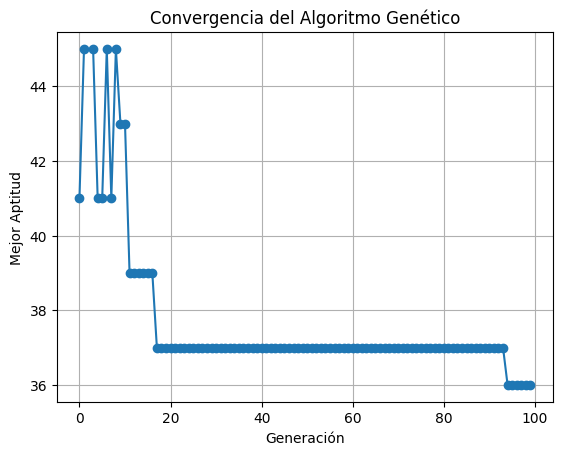

In [23]:
# Evaluación del circuito para un conjunto de entradas
def evaluar_circuito(individuo, entradas):
    pila = []
    for gen in individuo:
        if gen in terminales:
            pila.append(entradas[terminales.index(gen)])
        elif gen in funciones:
            if gen == 'NOT':
                if len(pila) >= 1:
                    operando = pila.pop()
                    resultado = funciones[gen](operando)
                    pila.append(resultado)
                else:
                    raise ValueError("La operación 'NOT' necesita un operando en la pila.")
            else:
                if len(pila) >= 2:
                    operando2 = pila.pop()
                    operando1 = pila.pop()
                    resultado = funciones[gen](operando1, operando2)
                    pila.append(resultado)
                else:
                    raise ValueError("La operación necesita dos operandos en la pila.")
    if len(pila) == 1:
        return pila[0]
    else:
        raise ValueError("El diseño del circuito no es válido. Falta operar en algunos valores.")

# Creación de un individuo (cromosoma)
def crear_individuo():
    longitud_cromosoma = random.randint(10, 20)
    return [random.choice(terminales + list(funciones.keys())) for _ in range(longitud_cromosoma)]

# Tamaño de la población y número de generaciones
tamano_poblacion = 500
generaciones = 100
tasa_mutacion = 0.1

# Historia de la mejor aptitud para trazar la convergencia
historia_mejor_aptitud = []

# Creación de la población inicial
poblacion = [crear_individuo() for _ in range(tamano_poblacion)]

# Evolución de la población
for generacion in range(generaciones):
    valores_aptitud = [aptitud(individuo) for individuo in poblacion]
    mejor_individuo = poblacion[valores_aptitud.index(min(valores_aptitud))]
    historia_mejor_aptitud.append(aptitud(mejor_individuo))

    # Utilizar selección de torneo para la selección
    seleccionados = []
    for _ in range(tamano_poblacion // 2):
        torneo = random.sample(range(tamano_poblacion), 5)  # Torneo con 5 individuos aleatorios
        ganador = min(torneo, key=lambda x: valores_aptitud[x])
        seleccionados.append(poblacion[ganador])

    nueva_poblacion = []
    for _ in range(tamano_poblacion // 2):
        padre1, padre2 = random.choices(seleccionados, k=2)
        punto_cruce = random.randint(1, min(len(padre1), len(padre2)) - 1)
        hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
        hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]

        if random.random() < tasa_mutacion:
            punto_mutacion = random.randint(0, len(hijo1) - 1)
            hijo1[punto_mutacion] = random.choice(terminales + list(funciones.keys()))
        if random.random() < tasa_mutacion:
            punto_mutacion = random.randint(0, len(hijo2) - 1)
            hijo2[punto_mutacion] = random.choice(terminales + list(funciones.keys()))

        nueva_poblacion.extend([hijo1, hijo2])

    poblacion = nueva_poblacion

# Encontrar el mejor individuo después de la evolución
mejor_individuo = poblacion[valores_aptitud.index(min(valores_aptitud))]
mejor_aptitud = aptitud(mejor_individuo)

print("Mejor diseño:", mejor_individuo)
print("\n")
print("Aptitud del mejor diseño:", mejor_aptitud)
print("\n")
# Gráfica de convergencia
plt.plot(range(generaciones), historia_mejor_aptitud, marker='o')
plt.xlabel("Generación")
plt.ylabel("Mejor Aptitud")
plt.title("Convergencia del Algoritmo Genético")
plt.grid(True)
plt.show()
